## Police Killings

The Guardian launched “The Counted,” an impressive interactive database of Americans killed by police since the start of the year. It started in 2015, but you can check the recent stats for 2016. We will explore the data by race, income and state.

### Assignment

- Import the data and examine the head and columns
- Get the total counts for each racial grouping
- Find the relative % for each racial grouping
- How do the killings compare with the overall US breakdown of population by race?

In [45]:
import pandas as pd
killings=pd.read_csv('police_killings.csv',encoding = 'ISO-8859-1')
killings.columns

Index(['name', 'age', 'gender', 'raceethnicity', 'month', 'day', 'year',
       'streetaddress', 'city', 'state', 'latitude', 'longitude', 'state_fp',
       'county_fp', 'tract_ce', 'geo_id', 'county_id', 'namelsad',
       'lawenforcementagency', 'cause', 'armed', 'pop', 'share_white',
       'share_black', 'share_hispanic', 'p_income', 'h_income',
       'county_income', 'comp_income', 'county_bucket', 'nat_bucket', 'pov',
       'urate', 'college'],
      dtype='object')

In [9]:
killings.head()

,name,age,gender,raceethnicity,month,day,year,streetaddress,city,state,...,share_hispanic,p_income,h_income,county_income,comp_income,county_bucket,nat_bucket,pov,urate,college
0,A'donte Washington,16,Male,Black,February,23,2015,Clearview Ln,Millbrook,AL,...,5.6,28375,51367.0,54766,0.937936,3.0,3.0,14.1,0.097686,0.168510
1,Aaron Rutledge,27,Male,White,April,2,2015,300 block Iris Park Dr,Pineville,LA,...,0.5,14678,27972.0,40930,0.683411,2.0,1.0,28.8,0.065724,0.111402
2,Aaron Siler,26,Male,White,March,14,2015,22nd Ave and 56th St,Kenosha,WI,...,16.8,25286,45365.0,54930,0.825869,2.0,3.0,14.6,0.166293,0.147312
3,Aaron Valdez,25,Male,Hispanic/Latino,March,11,2015,3000 Seminole Ave,South Gate,CA,...,98.8,17194,48295.0,55909,0.863814,3.0,3.0,11.7,0.124827,0.050133
4,Adam Jovicic,29,Male,White,March,19,2015,364 Hiwood Ave,Munroe Falls,OH,...,1.7,33954,68785.0,49669,1.384868,5.0,4.0,1.9,0.063550,0.403954


In [2]:
#Get the total counts for each racial grouping
race=killings.groupby('raceethnicity').count().iloc[:,0]
race

raceethnicity
Asian/Pacific Islander     10
Black                     135
Hispanic/Latino            67
Native American             4
Unknown                    15
White                     236
Name: name, dtype: int64

In [3]:
#Find the relative % for each racial grouping
total=killings.shape[0]
temp_race=killings.groupby('raceethnicity').count()/total
temp_race.iloc[:,0]*100

raceethnicity
Asian/Pacific Islander     2.141328
Black                     28.907923
Hispanic/Latino           14.346895
Native American            0.856531
Unknown                    3.211991
White                     50.535332
Name: name, dtype: float64

In [4]:
#How do the killings compare with the overall US breakdown of population by race?
#mapping table from deaths.ipynb
mapping = { "Asian/Pacific Islander": 15159516 + 674625, "Native American/Native Alaskan": 3739506, "Black": 40250635, "Hispanic": 44618105, "White": 197318956 }
total_mapping=sum(mapping.values())
mapping_ratio=mapping
for k,v in mapping_ratio.items():
    mapping_ratio[k]=round(v/total_mapping,6)*100
mapping_ratio

{'Asian/Pacific Islander': 5.247199999999999,
 'Black': 13.3386,
 'Hispanic': 14.7859,
 'Native American/Native Alaskan': 1.2392,
 'White': 65.3891}

### Assignment

- Graph the killings by race using a bar chart. Make sure to label the graph and axes
- Graph the killings by "p_income" using a histogram with different bin amounts (remember to remove any "-" values)
- Calculate the median "p_income"

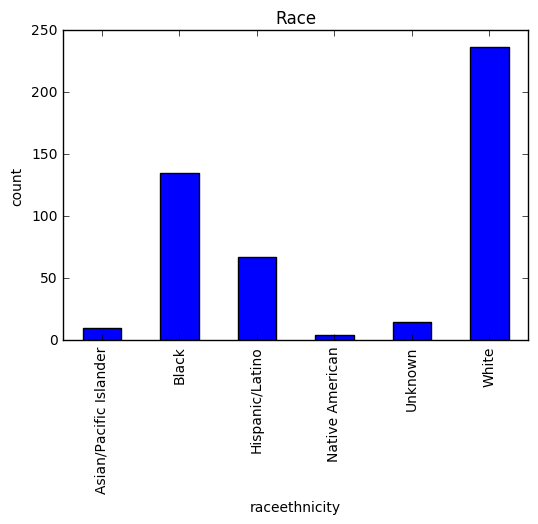

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
fig=race.plot(kind='bar', title='Race' )
fig.set_ylabel('count')

In [17]:
#Graph the killings by "p_income" using a histogram with different bin amounts (remember to remove any "-" values)
killings['p_income_num']=-100

for i in range(len(killings)):
    if killings['p_income'].iloc[i]=='-':
        killings['p_income_num'].iloc[i]=0
    else:
        killings['p_income_num'].iloc[i]=int(killings['p_income'].iloc[i])
print(killings['p_income_num'].min())
killings['p_income'].max()

/Users/adribadri/anaconda/lib/python3.5/site-packages/pandas/core/indexing.py:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


0


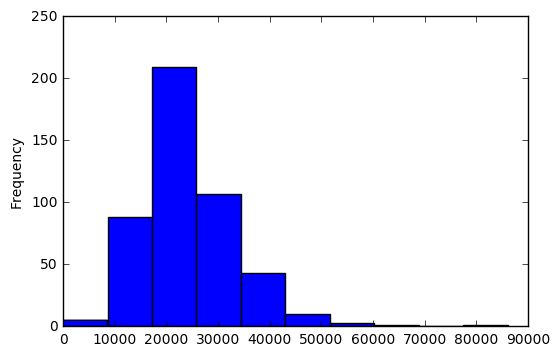

In [32]:
killings['p_income_num'].plot(kind='hist')

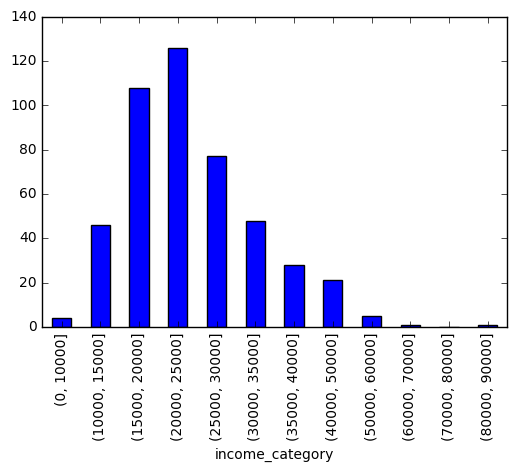

In [37]:
bins=[0,10000,15000,20000,25000,30000,35000,40000,50000,60000,70000,80000,90000]
killings['income_category'] = pd.cut(killings['p_income_num'], bins)
killings.groupby(['income_category']).count().iloc[:,0].plot(kind='bar')

In [39]:
#Calculate the median "p_income"
killings['p_income_num'].median()

22255.0

### Assignment

- Find the total killings per each state
- Create a new dataframe and remove any "-" from the following columns "share_white", "share_black" and "share_hispanic" 
- Convert the values in those columns to float types
- Find the mean of 'pop', 'county_income' and those 3 columns for the following subsets
    
    lowest_states = ["CT", "PA", "IA", "NY", "MA", "NH", "ME", "IL", "OH", "WI"]
    
    highest_states = ["OK", "AZ", "NE", "HI", "AK", "ID", "NM", "LA", "CO", "DE"]

In [44]:
#Find the total killings per each state
killings.groupby('state').count().iloc[:,0]

state
AK     2
AL     8
AR     4
AZ    25
CA    74
CO    12
CT     1
DC     1
DE     2
FL    29
GA    16
HI     4
IA     2
ID     4
IL    11
IN     8
KS     6
KY     7
LA    11
MA     5
MD    10
ME     1
MI     9
MN     6
MO    10
MS     6
MT     2
NC    10
NE     6
NH     1
NJ    11
NM     5
NV     3
NY    14
OH    10
OK    22
OR     8
PA     7
SC     9
TN     6
TX    46
UT     5
VA     9
WA    11
WI     5
WV     2
WY     1
Name: name, dtype: int64

In [49]:
#Create a new dataframe and remove any "-" from the following columns "share_white", "share_black" and "share_hispanic"
killings_new=killings
killings_new['share_white'].replace(to_replace='-', value=0, inplace=True)
killings_new['share_black'].replace(to_replace='-', value=0, inplace=True)
killings_new['share_hispanic'].replace(to_replace='-', value=0, inplace=True)
#Convert the values in those columns to float types
for i in range(len(killings_new)):
    killings_new['share_white'].iloc[i]=float(killings_new['share_white'].iloc[i])
    killings_new['share_black'].iloc[i]=float(killings_new['share_black'].iloc[i])
    killings_new['share_hispanic'].iloc[i]=float(killings_new['share_hispanic'].iloc[i])

/Users/adribadri/anaconda/lib/python3.5/site-packages/pandas/core/indexing.py:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [59]:
#Find the mean of 'pop', 'county_income' and those 3 columns for the following subsets
lowest_states = ["CT", "PA", "IA", "NY", "MA", "NH", "ME", "IL", "OH", "WI"]
highest_states = ["OK", "AZ", "NE", "HI", "AK", "ID", "NM", "LA", "CO", "DE"]
killings_low_states=killings[killings['state'].isin(lowest_states)]
killings_high_states=killings[killings['state'].isin(highest_states)]
#lowest_states
print(killings_low_states[['pop','county_income','share_white','share_black','share_hispanic']].mean())
print()
#highest_states
print(killings_high_states[['pop','county_income','share_white','share_black','share_hispanic']].mean())

pop                4127.947368
county_income     54761.473684
share_white          59.552632
share_black          20.884211
share_hispanic       12.721053
dtype: float64

pop                4269.344086
county_income     48702.172043
share_white          55.053763
share_black          11.408602
share_hispanic       20.470968
dtype: float64
